<a href="https://colab.research.google.com/github/nxxk23/kidney/blob/main/stage_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
table = pd.read_csv('/content/drive/MyDrive/kidney/widetable.csv')
table = table.drop(['Unnamed: 0'], axis=1)
table.head()

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,Sex,Age,ENTY,...,G1M8_Alpha_blocker,G2M6_Insulin,G2M4_TZD,G4M2_Febuxostat,G3M2_Ezetimibe,G1M4_Non-dihydropyridine_CCB,G5M1_Ketoanalog_amino_acid,G2M7_GLP1_RA,G4M3_Uricosuric_agent,LabLocation
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15 09:51:54.913,NaN,หญิง,73.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.8,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,หญิง,73.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.2,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,หญิง,74.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.2,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,หญิง,74.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.6,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,หญิง,74.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย


In [3]:
table = table.rename(columns={'ResultValue': 'eGFR'})
table = table.drop(['ResultItemName'], axis=1)
table.head()

,PatientUID,PatientVisitUID,CWhen,eGFR,datetime,PreviousDateTime,Sex,Age,ENTY,NATNL,...,G1M8_Alpha_blocker,G2M6_Insulin,G2M4_TZD,G4M2_Febuxostat,G3M2_Ezetimibe,G1M4_Non-dihydropyridine_CCB,G5M1_Ketoanalog_amino_acid,G2M7_GLP1_RA,G4M3_Uricosuric_agent,LabLocation
0,2299,3386255,2559-08-15 09:51:54.913,71.7,2016-08-15 09:51:54.913,NaN,หญิง,73.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
1,2299,3640924,2559-11-11 09:40:06.053,66.8,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,หญิง,73.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
2,2299,4020970,2560-03-31 10:18:54.363,67.2,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
3,2299,4286612,2560-07-05 10:40:40.763,69.2,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
4,2299,4546471,2560-10-03 09:19:54.710,63.6,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย


## Create **stage** column

In [4]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return '1'
    elif 89.99 >= eGFR_value >= 60:
        return '2'
    elif 59.99 >= eGFR_value >= 30:
        return '3'
    elif 29.99 >= eGFR_value >= 15:
        return '4'
    else:
        return '5'

# เพิ่มคอลัมน์ 'stage' เข้าไปในตาราง
table['stage'] = table['eGFR'].apply(categorize_eGFR)

### latest stage

In [5]:
# Get the latest stage for each PatientUID
latest_stages = table.sort_values('PatientVisitUID').groupby('PatientUID').last()['stage'].reset_index()

# Merge the latest stage back to the original DataFrame
table = table.merge(latest_stages, on='PatientUID', suffixes=('', '_latest'))

In [6]:
table[['PatientUID','PatientVisitUID','stage_latest']]

,PatientUID,PatientVisitUID,stage_latest
0,2299,3386255,2
1,2299,3640924,2
2,2299,4020970,2
3,2299,4286612,2
4,2299,4546471,2
...,...,...,...
318670,3432056,10312896,3
318671,3432056,10408954,3
318672,3432056,10573233,3
318673,3437526,10191122,3


stage_latest
3    181287
2     82543
4     29910
5     19344
1      5591
Name: count, dtype: int64


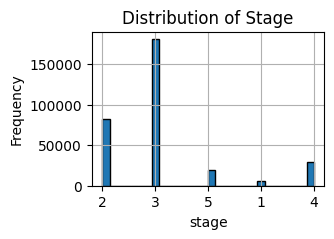

In [7]:
import matplotlib.pyplot as plt

print(table['stage_latest'].value_counts())
plt.figure(figsize=(3, 2))
plt.hist(table['stage_latest'], bins=30, edgecolor='black')
plt.title('Distribution of Stage')
plt.xlabel('stage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [8]:
df = table.copy()

In [9]:
table[['PatientUID','PatientVisitUID','stage_latest']]

,PatientUID,PatientVisitUID,stage_latest
0,2299,3386255,2
1,2299,3640924,2
2,2299,4020970,2
3,2299,4286612,2
4,2299,4546471,2
...,...,...,...
318670,3432056,10312896,3
318671,3432056,10408954,3
318672,3432056,10573233,3
318673,3437526,10191122,3


### Create **Fold** column from **latest eGFR stage** in each patientUID

In [10]:
import pandas as pd
import numpy as np

# Assuming 'table' is your DataFrame
table.sort_values(by=['PatientUID', 'PatientVisitUID'], inplace=True)

num_folds = 5
folds = [[] for _ in range(num_folds)]
patients_in_folds = {fold_index: set() for fold_index in range(num_folds)}
stage_count = {fold_index: {stage: 0 for stage in table['stage_latest'].unique()} for fold_index in range(num_folds)}

# Get unique patients
unique_patients = table['PatientUID'].unique()

# Distribute patients into folds ensuring balanced stages
for patient_uid in unique_patients:
    patient_data = table[table['PatientUID'] == patient_uid]
    patient_stage = patient_data['stage_latest'].iloc[0]  # Assuming stage doesn't change for a patient

    # Find the fold with the minimum number of patients and balanced stage
    min_fold = min(stage_count, key=lambda k: (stage_count[k][patient_stage], len(patients_in_folds[k])))

    folds[min_fold].extend(patient_data.index.tolist())
    patients_in_folds[min_fold].add(patient_uid)
    stage_count[min_fold][patient_stage] += 1

# Assign the fold numbers back to the DataFrame
fold_column = np.empty(len(table), dtype=int)
for fold_index, fold_indices in enumerate(folds):
    fold_column[fold_indices] = fold_index
table['Fold'] = fold_column

# Optionally, sort by index or any other requirement after assigning folds
# table.sort_index(inplace=True)
table.head()


,PatientUID,PatientVisitUID,CWhen,eGFR,datetime,PreviousDateTime,Sex,Age,ENTY,NATNL,...,G4M2_Febuxostat,G3M2_Ezetimibe,G1M4_Non-dihydropyridine_CCB,G5M1_Ketoanalog_amino_acid,G2M7_GLP1_RA,G4M3_Uricosuric_agent,LabLocation,stage,stage_latest,Fold
0,2299,3386255,2559-08-15 09:51:54.913,71.7,2016-08-15 09:51:54.913,NaN,หญิง,73.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0
1,2299,3640924,2559-11-11 09:40:06.053,66.8,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,หญิง,73.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0
2,2299,4020970,2560-03-31 10:18:54.363,67.2,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0
3,2299,4286612,2560-07-05 10:40:40.763,69.2,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0
4,2299,4546471,2560-10-03 09:19:54.710,63.6,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,หญิง,74.0,Out Patient,ไทย,...,0.0,0.0,0.0,0.0,0.0,0.0,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2,2,0


In [11]:
# Check if any patient is in multiple folds
for fold_index, patient_set in patients_in_folds.items():
    for other_fold_index in range(fold_index + 1, 5):  # Optimize by avoiding duplicate checks
        other_patient_set = patients_in_folds[other_fold_index]
        common_patients = patient_set.intersection(other_patient_set)
        if common_patients:
            print(f"Error: Patients {common_patients} are in multiple folds ({fold_index + 1} and {other_fold_index + 1})")

# If no errors are printed, it means each patient is in only one fold

In [12]:
table[['PatientUID','PatientVisitUID','eGFR','stage_latest','Fold']]

,PatientUID,PatientVisitUID,eGFR,stage_latest,Fold
0,2299,3386255,71.70,2,0
1,2299,3640924,66.80,2,0
2,2299,4020970,67.20,2,0
3,2299,4286612,69.20,2,0
4,2299,4546471,63.60,2,0
...,...,...,...,...,...
318670,3432056,10312896,72.86,3,0
318671,3432056,10408954,68.69,3,0
318672,3432056,10573233,45.08,3,0
318673,3437526,10191122,55.94,3,1


In [13]:
table['Fold'].value_counts() #จน.แถวในแต่ละ fold

Fold
4    64449
2    64092
3    63827
1    63236
0    63071
Name: count, dtype: int64

## check how **latest stage** assigned to fold

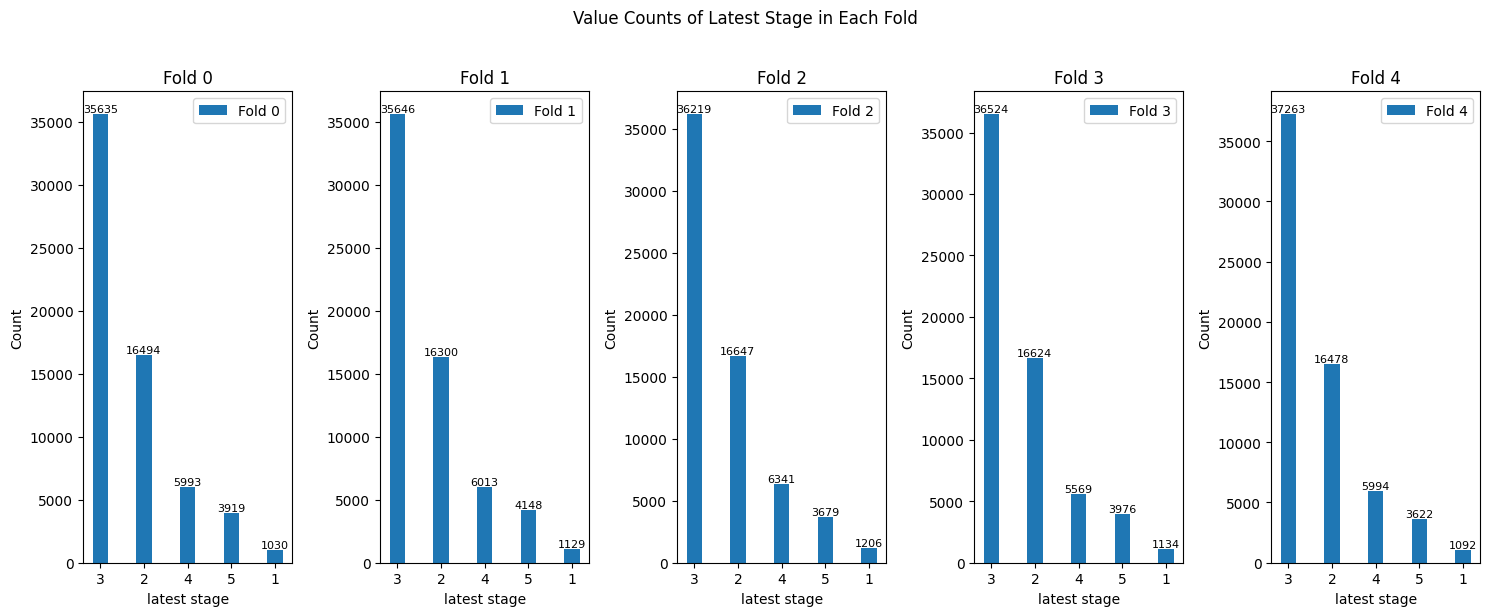

In [14]:
import matplotlib.pyplot as plt
import numpy as np

num_folds = 5
fig, axes = plt.subplots(nrows=1, ncols=num_folds, figsize=(15, 6))  # Use subplots to create separate axes for each fold

bar_width = 0.35
for fold_index, ax in enumerate(axes):
    fold_df = table[table['Fold'] == fold_index]
    stage_value_counts = fold_df['stage_latest'].value_counts()

    bar_positions = np.arange(len(stage_value_counts))  # Adjust the positions of the bars based on the number of unique groups

    bars = ax.bar(bar_positions, stage_value_counts.values, width=bar_width, label=f'Fold {fold_index}')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(stage_value_counts.index)
    ax.set_xlabel('latest stage')
    ax.set_ylabel('Count')
    ax.legend()
    ax.set_title(f'Fold {fold_index}')
    for bar, count in zip(bars, stage_value_counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                ha='center', va='bottom', fontsize=8, color='black')
plt.suptitle('Value Counts of Latest Stage in Each Fold', y=1.02)
plt.tight_layout()
plt.show()

In [15]:
table['stage'].value_counts()

stage
3    167994
2    107489
4     23951
1     10203
5      9038
Name: count, dtype: int64

In [16]:
table['stage_latest'].value_counts() #ใช้อันนี้ในการจัด fold

stage_latest
3    181287
2     82543
4     29910
5     19344
1      5591
Name: count, dtype: int64

In [17]:
table[['PatientUID','PatientVisitUID','eGFR','datetime','PreviousDateTime','stage','stage_latest','Fold']]

,PatientUID,PatientVisitUID,eGFR,datetime,PreviousDateTime,stage,stage_latest,Fold
0,2299,3386255,71.70,2016-08-15 09:51:54.913,NaN,2,2,0
1,2299,3640924,66.80,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,2,2,0
2,2299,4020970,67.20,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,2,2,0
3,2299,4286612,69.20,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,2,2,0
4,2299,4546471,63.60,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,2,2,0
...,...,...,...,...,...,...,...,...
318670,3432056,10312896,72.86,2023-01-30 16:16:45.013,2023-01-27 12:22:43.000,2,3,0
318671,3432056,10408954,68.69,2023-02-24 21:05:12.747,2023-01-30 16:16:45.013,2,3,0
318672,3432056,10573233,45.08,2023-04-10 09:51:32.587,2023-02-24 21:05:12.747,3,3,0
318673,3437526,10191122,55.94,2022-12-26 09:29:11.307,2023-04-10 09:51:32.587,3,3,1


##Save

In [18]:
table.to_csv('/content/drive/MyDrive/kidney/stagefold.csv')